✅ First 5 rows of the dataset:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons  

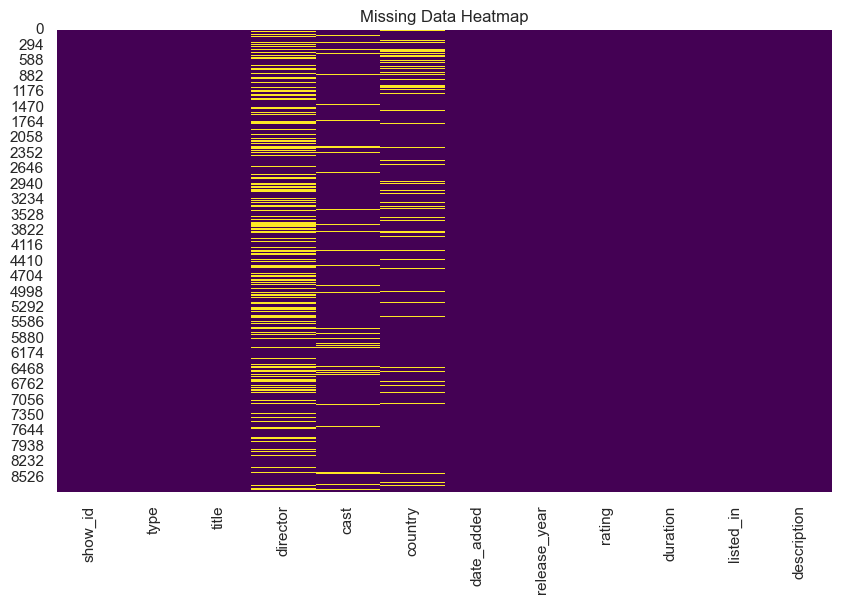

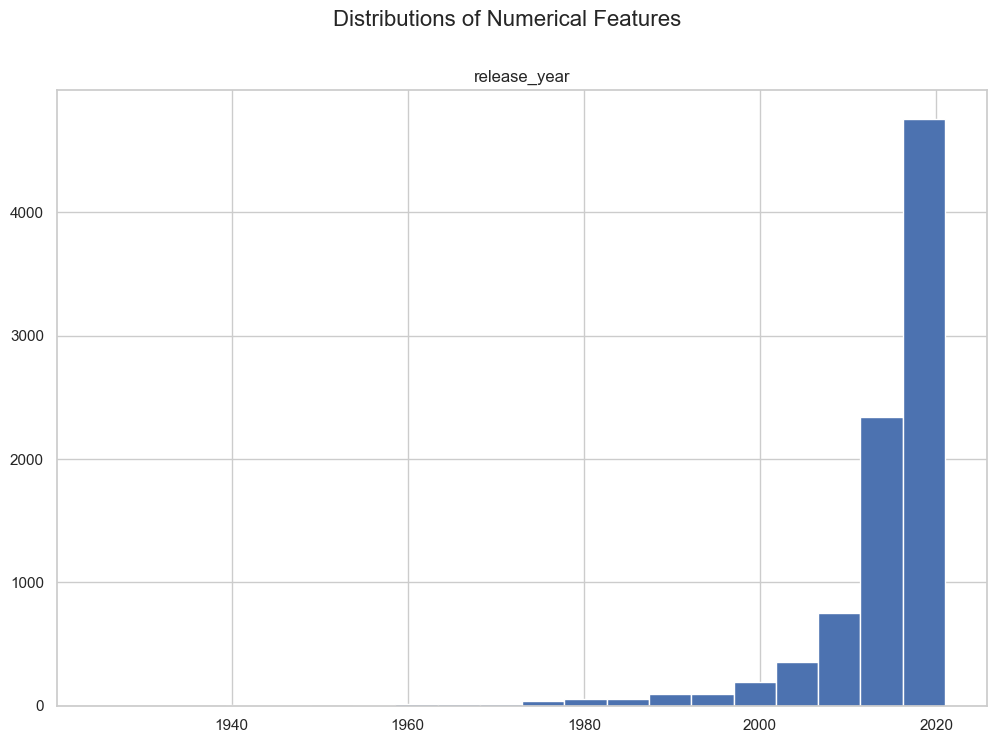

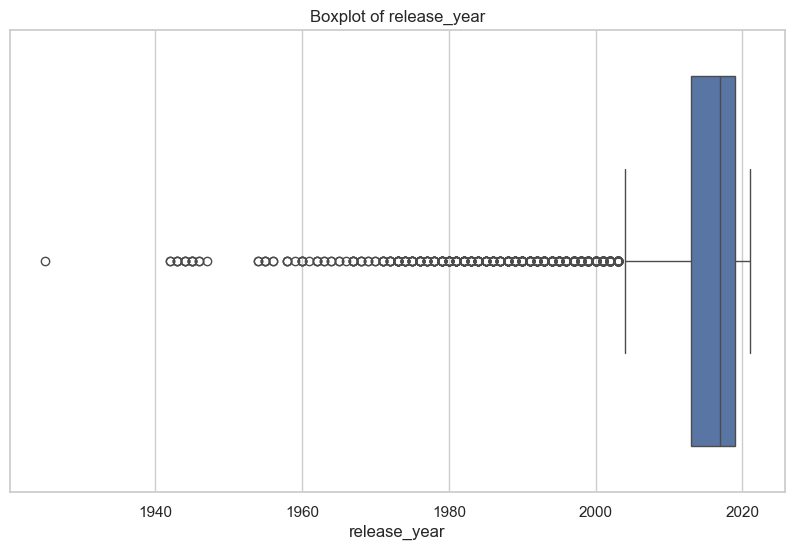

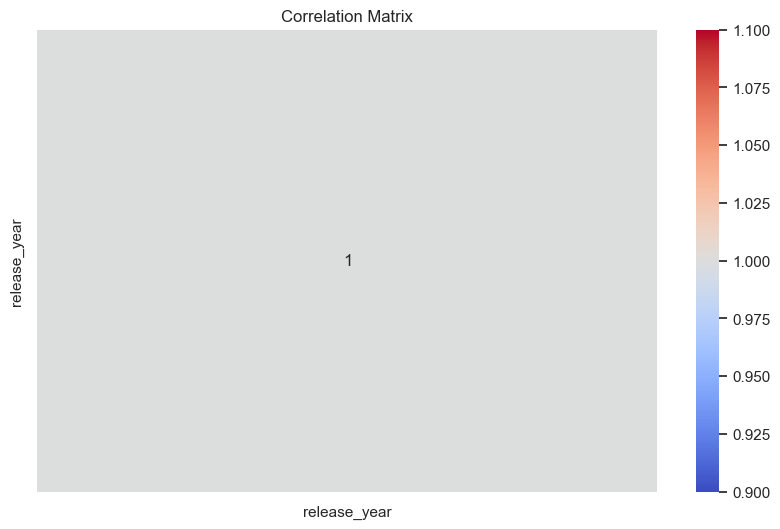

Too few or too many numeric columns for pairplot. Skipping.


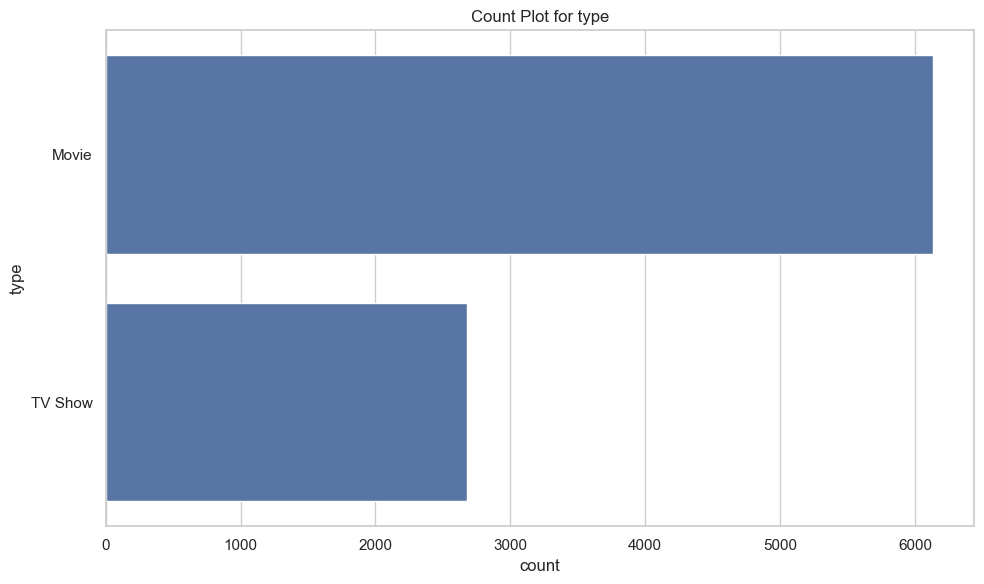

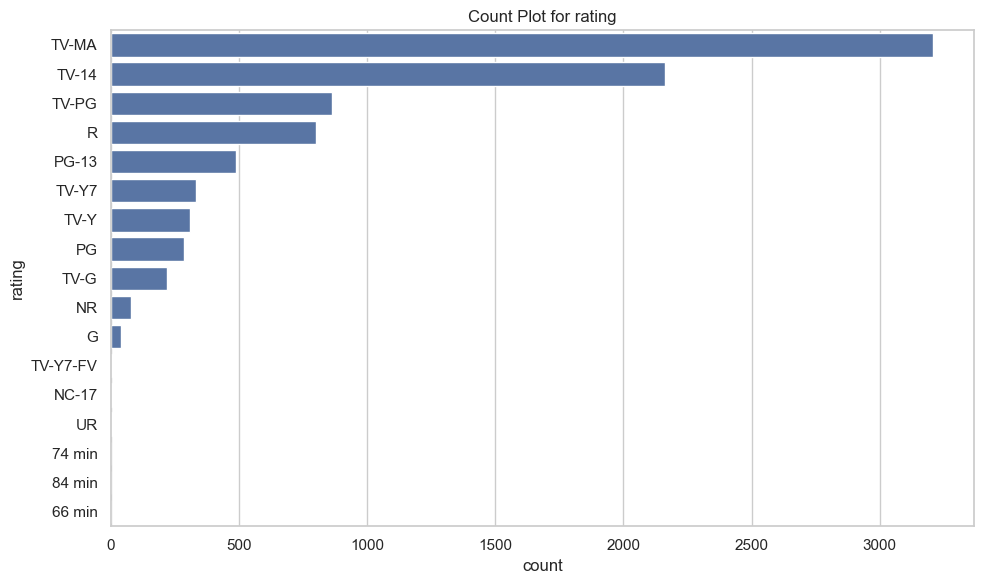

<Figure size 1000x600 with 0 Axes>

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


file_path = 'C:\\Users\\ranja\\OneDrive\\Desktop\\netflix_titles.csv'
df = pd.read_csv(file_path)


print("✅ First 5 rows of the dataset:")
print(df.head())

print("\n📄 Dataset Info:")
print(df.info())

print("\n📊 Summary Statistics:")
print(df.describe(include='all'))


print("\n❓ Missing Values per Column:")
print(df.isnull().sum())


sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


numeric_cols = df.select_dtypes(include='number')
if not numeric_cols.empty:
    numeric_cols.hist(bins=20, figsize=(12, 8))
    plt.suptitle("Distributions of Numerical Features", fontsize=16)
    plt.show()
else:
    print("No numeric columns available for distribution plots.")

for col in numeric_cols.columns:
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

if not numeric_cols.empty:
    corr = numeric_cols.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()
else:
    print("No numeric columns available for correlation analysis.")

if numeric_cols.shape[1] <= 5 and numeric_cols.shape[1] > 1:
    sns.pairplot(numeric_cols)
    plt.suptitle("Pairplot of Numeric Variables", y=1.02)
    plt.show()
else:
    print("Too few or too many numeric columns for pairplot. Skipping.")

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    if df[col].nunique() < 20 and df[col].nunique() > 1:
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f"Count Plot for {col}")
        plt.tight_layout()
        plt.show()
        plt.savefig("Desktop.png")